# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
### Data generation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

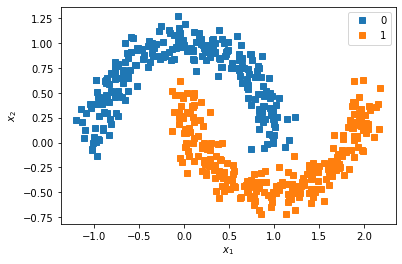

In [2]:
### This function allows to plot the two moons
mm = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
mm_group = mm.groupby('label')
for name, group in mm_group:
    plt.plot(group['x'], group['y'], marker='s', linestyle="", label=name)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout
#The famous synthetique data are nonlinearly seperable meant for classification


In [3]:
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', marker='o', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', marker='s',alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()
    plt.legend(loc ='best')

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

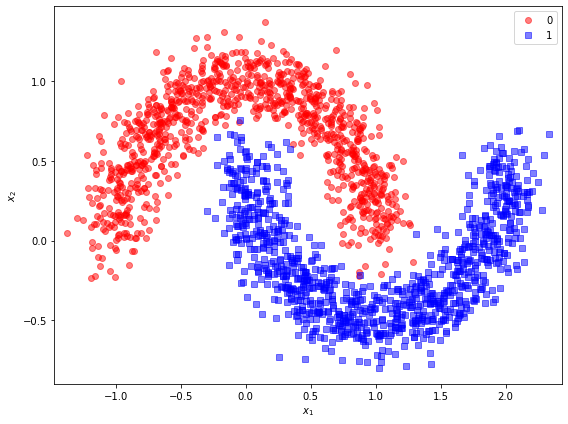

In [4]:
C, d = make_moons(n_samples=2000, noise=0.13)
plot_data(C, d)

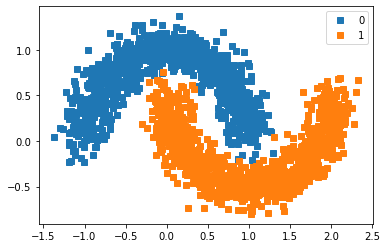

In [5]:
### This function allows to plot the two moons
mb = pd.DataFrame(dict(c=C[:,0], d=C[:,1], label=d))
mb_group = mb.groupby('label')
for name, group in mb_group:
    plt.plot(group['c'], group['d'], marker='s', linestyle="", label=name)
plt.legend()


❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [7]:
B, a = make_moons(n_samples=250, noise=0.20, random_state=0)
ma = pd.DataFrame(dict(b=B[:,0], a=B[:,1], label=a))
target = ma.label
ma.drop(['label'], axis=1, inplace=True)
r = target
R = ma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(R,r,test_size=0.3,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((175, 2), (175,), (75, 2), (75,))

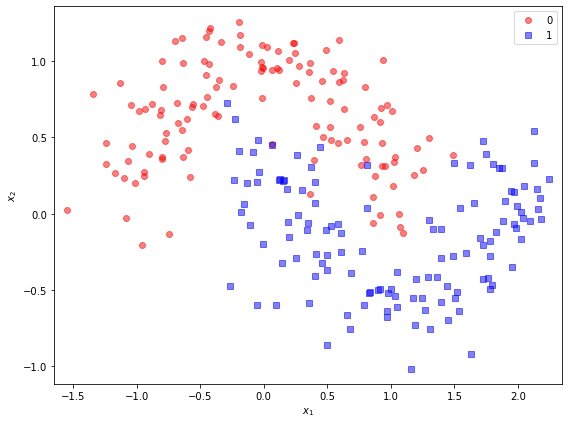

In [8]:
plot_data(B, a)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def initialize_model():
 model = Sequential()
 model.add(Dense(5, input_shape=(2,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
 return model
models = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [10]:
models.summary();#21 parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [88]:
history = models.fit(X_train, y_train, verbose=0, epochs=10, batch_size=32, validation_data=(X_test, y_test))

### Fit history

In [89]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.032763,0.988571,0.245296,0.92,5
6,0.032244,0.988571,0.242940,0.92,6
7,0.033374,0.988571,0.241694,0.92,7
8,0.032868,0.988571,0.246380,0.92,8
9,0.032391,0.988571,0.249115,0.92,9


`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [85]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fa620a46c40>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.033144500106573105,
   0.03405013307929039,
   0.034466929733753204,
   0.034320734441280365,
   0.03357846662402153,
   0.03384116291999817,
   0.03331001102924347,
   0.03329456225037575,
   0.03306123614311218,
   0.03313185274600983],
  'accuracy': [0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666,
   0.9885714054107666],
  'val_loss': [0.2381887286901474,
   0.23168283700942993,
   0.23301060497760773,
   0.23917315900325775,
   0.24297963082790375,
   0.24147947132587433,
   0.24218864738941193,
   0.2418556660413742,
   0.2438313513994217,
   0.24285301566123962],
  'val_accuracy': [0.9200000166893005,
   0.9200000166893005,
   0.920000016

❓ Plot the history of the train loss using the following function

In [111]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    accuracy = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, accuracy))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

def plot_losses(history):
    plt.figure(figsize=(9,5))
    plt.plot(history.epoch, np.array(history.history['loss']), 'r', label='loss', linewidth=3.0)
    #plt.plot(history.epoch, np.array(history.history['val_loss']), 'b', label='val loss', linewidth=3.0)
    plt.xlabel('Epochs',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Train/Test Loss Curves',fontsize=16)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.margins(0.02)
    plt.show()

    plt.figure(figsize=(9,5))   
    plt.plot(history.history['accuracy'], 'r', label='accuracy', linewidth=3.0)
    #plt.plot(history.history['val_accuracy'], 'b', label='val accuracy', linewidth=3.0)
    plt.xlabel('Epochs',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Train/Test acc Curves',fontsize=16)
    plt.legend(['Training acc', 'Validation acc'],fontsize=18)
    plt.margins(0.02)
    plt.show()

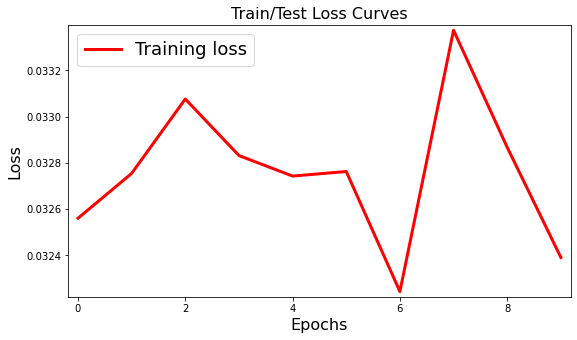

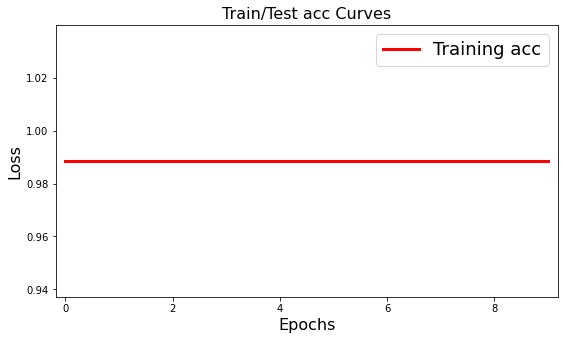

In [112]:
plot_losses(history)

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [16]:
y_pred = models.predict(X_test, verbose=0)
y_pred = (y_pred > 0.5)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [81]:
# Evaluate the model on test data
score = models.evaluate(X_test,y_test,verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

3/3 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9200
Test Loss : 0.2533
Test Accuracy : 0.9200


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [82]:
# Evaluate the model on test data
_, test_acc = models.evaluate(X_test, y_test, verbose=1)

print(f"Test accuracy: {test_acc:.5f}")

3/3 [==============================] - 0s 4ms/step - loss: 0.2533 - accuracy: 0.9200
Test accuracy: 0.92000


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()

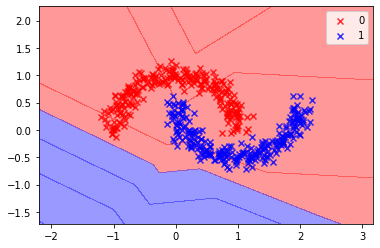

In [20]:
plot_decision_regions(X, y, classifier=models,resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [22]:
history = models.fit(X_train, y_train, verbose=0, epochs=500)

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.287882,0.868571,495
496,0.287797,0.874286,496
497,0.287817,0.874286,497
498,0.287723,0.874286,498
499,0.287620,0.874286,499


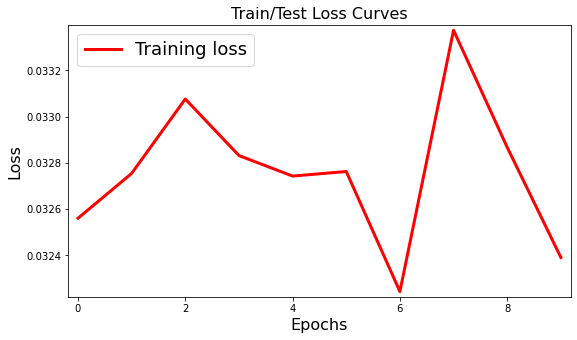

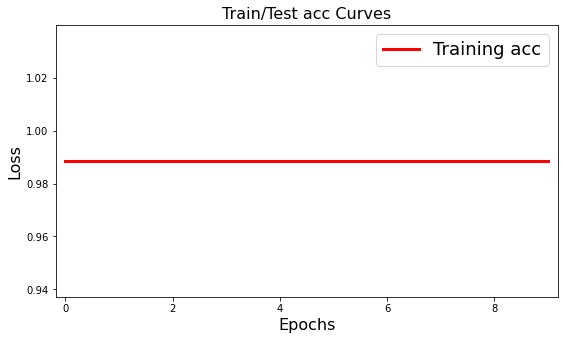

In [95]:
plot_losses(history)

❓ Did the test accuracy improve?

In [26]:
# Evaluate the model on test data
_, test_acc = models.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.85333


Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
def initialize_model():
 model = Sequential()
 model.add(Dense(20, input_shape=(2,), activation='relu'))
 model.add(Dense(10, input_shape=(2,), activation='relu'))
 model.add(Dense(5, input_shape=(2,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
 return model
models = initialize_model()

❓ What is the number of parameters of your new model?

In [51]:
models.summary();#331 parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [28]:
history = models.fit(X_train, y_train, verbose=0, epochs=500)

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.033605,0.988571,495
496,0.033744,0.988571,496
497,0.033884,0.988571,497
498,0.034053,0.988571,498
499,0.033301,0.988571,499


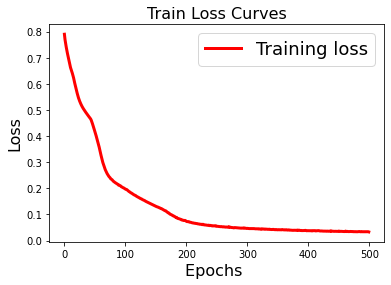

In [30]:
plot_losses(history)

In [31]:
# Evaluate the model on test data
_, test_acc = models.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 0.92000


❓ Do you think we have overfitted on the noise? Check it out below

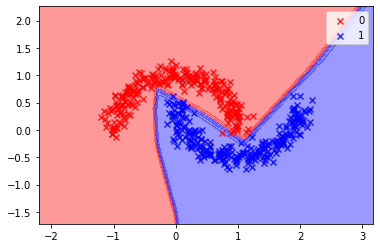

In [32]:
plot_decision_regions(X, y, classifier=models,resolution=0.02)